In [1]:
import json

with open('../data/submissions-2016-2020-raw-reddit-api-data.json') as json_f:
    submissions = json.load(json_f)['submissions']

In [2]:
len(submissions)

20389

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame(columns=[
    'text',
    'flair',
    'comments',
    'url',
    'score'
])

In [4]:
from tqdm import tqdm

for submission in tqdm(submissions):
    df = df.append(submission, ignore_index=True)
df.head()

100%|██████████| 20389/20389 [01:57<00:00, 173.60it/s]


,text,flair,comments,url,score,title
0,"This story needs a little setup, so bear with ...",not the a-hole,"[No, you're not the asshole here.\n\nIt's perf...",https://www.reddit.com/r/AmItheAsshole/comment...,43,AITA for not wanting my roommate to bring gues...
1,,not enough info,[You need more information. Any reason why yo...,https://www.reddit.com/r/AmItheAsshole/comment...,35,AITA for canceling our hangout because my frie...
2,[Here's the thread.](https://www.reddit.com/r/...,not the a-hole,[holy fuck that's a lot of rules. You're not t...,https://www.reddit.com/r/AmItheAsshole/comment...,17,AITA in this thread where a mod ended up banni...
3,I was having a conversation with my friend las...,not the a-hole,"[Not an asshole, but perhaps a little clueless...",https://www.reddit.com/r/AmItheAsshole/comment...,16,AITA for assuming my friend was talking behind...
4,So school started up last week on Wednesday an...,everyone sucks,"[That was pretty dickish of the teacher, but s...",https://www.reddit.com/r/AmItheAsshole/comment...,20,AITA for not doing my homework?


In [5]:
n_without_text = 0
for i, row in df.iterrows():
    if not row.text:
        n_without_text += 1
n_without_text

130

In [6]:
n_without_flair = 0
for i, row in df.iterrows():
    if not row.flair:
        n_without_flair += 1
n_without_flair

6277

In [7]:
df.flair = df.flair.str.lower()

<AxesSubplot:>

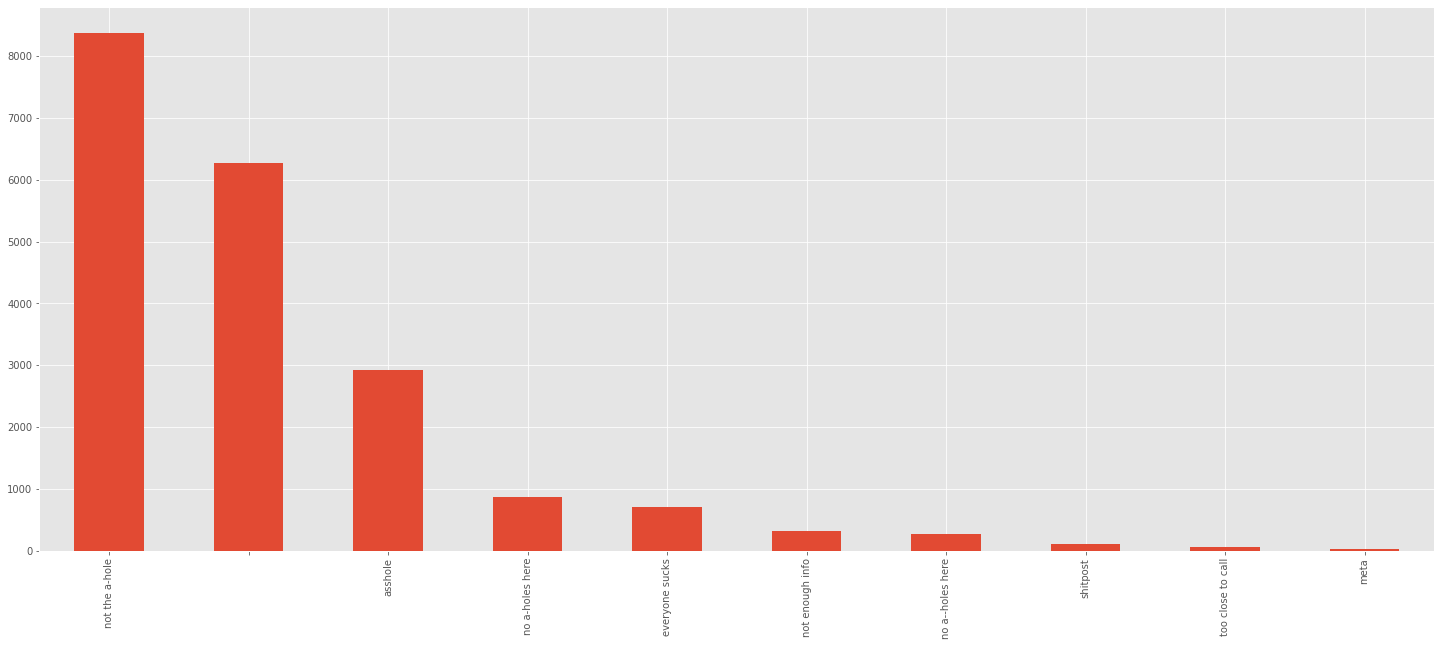

In [8]:
plt.rcParams['figure.figsize'] = (25.0, 10.0)
plt.style.use('ggplot')

df.flair.value_counts()[:10].plot(kind='bar')

In [9]:
counts_series = df.flair.value_counts()

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(counts_series)

not the a-hole                                            8377
                                                          6277
asshole                                                   2929
no a-holes here                                            875
everyone sucks                                             710
not enough info                                            322
no a--holes here                                           268
shitpost                                                   113
too close to call                                           65
meta                                                        29
troll                                                       20
tl;dr                                                       18
asshole (a bit)                                             10
teenager                                                     6
kinda                                                        6
teenagers                                              

In [11]:
mapper_dict = {
    'not the a-hole': 'NTA',
    '': '',
    'asshole': 'YTA',
    'no a-holes here': 'NAH',
    'everyone sucks': 'ESH',
    'not enough info': '',
    'no a--holes here': 'NAH',
    'shitpost': 'TROLL',
    'too close to call': '',
    'meta': 'META',
    'troll': 'TROLL',
    'tl;dr': '',
    'asshole (a bit)': 'YTA',
    'kinda': 'YTA',
    'teenager': '',
    'trolling': 'TROLL',
    'teenagers': '',
    'asshole (kind of)': 'YTA',
    'asshole (a bit)': 'YTA',
    'arsehole': 'YTA',
    'petty': '',
    'immature': '',
    'a bit': 'YTA',
    'kinda asshole': 'YTA',
    'literal shitpost': 'TROLL',
    'shitpost - trolling': 'TROLL',
    'probably fake': 'TROLL',
    'communicate': '',
    'let it go': '',
    'advice zone': '',
    'meta-asshole': '',
    'advice': '',
    'sort of': '',
    'total asshole': 'YTA',
    'not really': '',
    'tactless': '',
    'not a-hole, petty': 'NAH',
    'slightly': 'YTA',
    '[new]': '',
    'no responses': '',
    'asshole for posting': 'TROLL',
    '50/50': '',
    'asstroll': 'TROLL',
    'asshole-ish': 'YTA',
    'kind of asshole': 'YTA',
    'minor assholery': 'YTA',
    'overly sensitive': 'NAH',
    'shit post': 'TROLL',
    'shitty person': '',
    'not a-hole, rachel': 'NTA',
    'no cure for being a c*nt': '',
    'please don\'t.': '',
    'minor asshole': 'YTA',
    'just stupid': '',
    'um...what?': '',
    'op is an asshole': 'YTA',
    'relationships': '',
    'not a-hole, smug': 'NAH',
    'criminal': 'YTA',
    'asshole fer yellin': '',
    'get to r/legaladvice': '',
    '...........': '',
    'asshole (or young)': '',
    'jaden smith': '',
    'not a-hole, thief!': '',
    'r/humblebrag': '',
    'not an aita post': 'TROLL',
    'wat': 'TROLL',
    'not a-hole, mil is': 'NTA',
    'everyone sorta sucks': 'ESH',
    '50%asshole': 'YTA',
    '8 assholes!': 'YTA',
    'asshole baby': 'YTA',
    'sf asshole': 'YTA',
    'not a-hole, grow up': 'NTA',
    'asshole per se': 'YTA',
    'half asshole': 'YTA',
    'asshole kinda': 'YTA',
    'not the a-hole?': 'NTA',
    'well meaning asshole': 'YTA',
    'asshole for even posting this': 'YTA',
    'not not a-hole': 'YTA',
    'everyone sucks but gramps': 'ESH',
    '"not the a-hole!"': 'NTA',
    'asshole?': 'YTA',
    'charitable asshole': 'YTA',
    'not a-hole or shrink': 'NTA',
    'asshole (x3)': 'YTA',
    'not a-hole, enabler': 'NTA',
    'non issue': 'NAH',
    'everyone sensitive': 'NAH',
    '110% not a-hole': 'NTA',
    'obviously not': 'NTA',
    'mildly': 'YTA',
    'fb a-hole': 'YTA',
    'not the arsehole': 'NTA',
    'not a-hole, weirdo': 'NTA',
    'not a-hole, nuts': 'NTA',
    'kinda assholish': 'YTA',
    'not the a-hole, and she\'s an absolute trash ass bitch.': 'NTA',
    '20% asshole': 'YTA',
    'justified asshole': 'YTA',
    'i said not a-hole': 'NTA',
    'bit of a twat': 'YTA',
    'not the a-hole-': 'NTA',
    'a bit of an asshole': 'YTA',
    'of course not': 'NTA',
    'jerk': 'YTA',
    'not a-hole just nuts': 'NTA',
    'a little bit': 'YTA',
    'nut the a-hole': 'NTA',
    'righteous asshole': 'YTA',
    'mega-asshole': 'YTA',
    'not a-hole, friend is': 'NTA',
    'not the [spoiler]': 'NTA',
    'asshole ( ไอ้)': 'YTA',
    'asshole & victim': 'YTA',
    'little bit assholish': 'YTA',
    'abusive asshole': 'YTA',
    'likely not a-hole': 'NTA',
    'not arsehole': 'NTA',
    'not the meow': 'NTA',
    'asshole x 4': 'YTA',
    'nicht das arschloch': 'NTA',
    'asshole and thief': 'YTA',
    'not a-hole just kid': 'NTA',
    'future asshole': 'YTA',
    'def. not a-hole': 'NTA',
    'not ah; fuck bards': 'NTA',
    '(accidental) asshole': 'YTA',
    'nta, but sucker': 'NTA',
    'not a-hole, ingrate': 'NTA',
    'asshole soceity': 'ESH',
    'asshole/pasta': 'YTA',
    'n/a': 'NTA',
    'asshole - kinda': 'YTA',
    'silent asshole': 'YTA',
    'beautiful asshole': 'YTA',
    'still the asshole': 'YTA',
    'cheap asshole': 'YTA',
    'still not the a-hole': 'NTA',
    'asshole for driving': 'YTA',
    'asshole to doggo': 'YTA',
    'confusing asshole': 'YTA',
    '1/3 asshole': 'YTA',
    'justifiable asshole': 'YTA',
    'no assholes here': 'NAH',
    'family is asshole': 'NTA',
    'asshole, say hi': 'YTA',
    'slightly the asshole': 'YTA',
    '0% not the a-hole': 'YTA',
    'not a-hole just rude': 'NTA',
    ' asshole (probably)': 'YTA',
    'asshole; marry him': 'YTA',
    'not a-hole just idiot': 'NTA',
    'not a-hole, run': 'NTA',
    'not a-hole, dense': 'NTA',
    'asshole ...i guess': 'YTA',
    'colossal asshole': 'YTA',
    'not a-hole, dick': 'YTA',
    'not quite the a-hole': 'NTA',
    'not the a-hole but dumbass': 'NTA',
    'ewww... nta': 'NTA',
    'bad situation': 'ESH',
    'not a-hole; run': 'NTA',
    'a little butthole': 'YTA',
    'not a-hole. goarmy': 'NTA',
    'not the a-hole, but tell dad you love him op': 'NTA',
    'asshole in theory': 'YTA'
}

mapped_list = []
for i, row in tqdm(df.iterrows()):
    try:
        mapped_list.append(mapper_dict[row.flair])
    except KeyError:
        mapped_list.append('')
tag_series = pd.Series(mapped_list)

20389it [00:01, 13379.19it/s]


<AxesSubplot:>

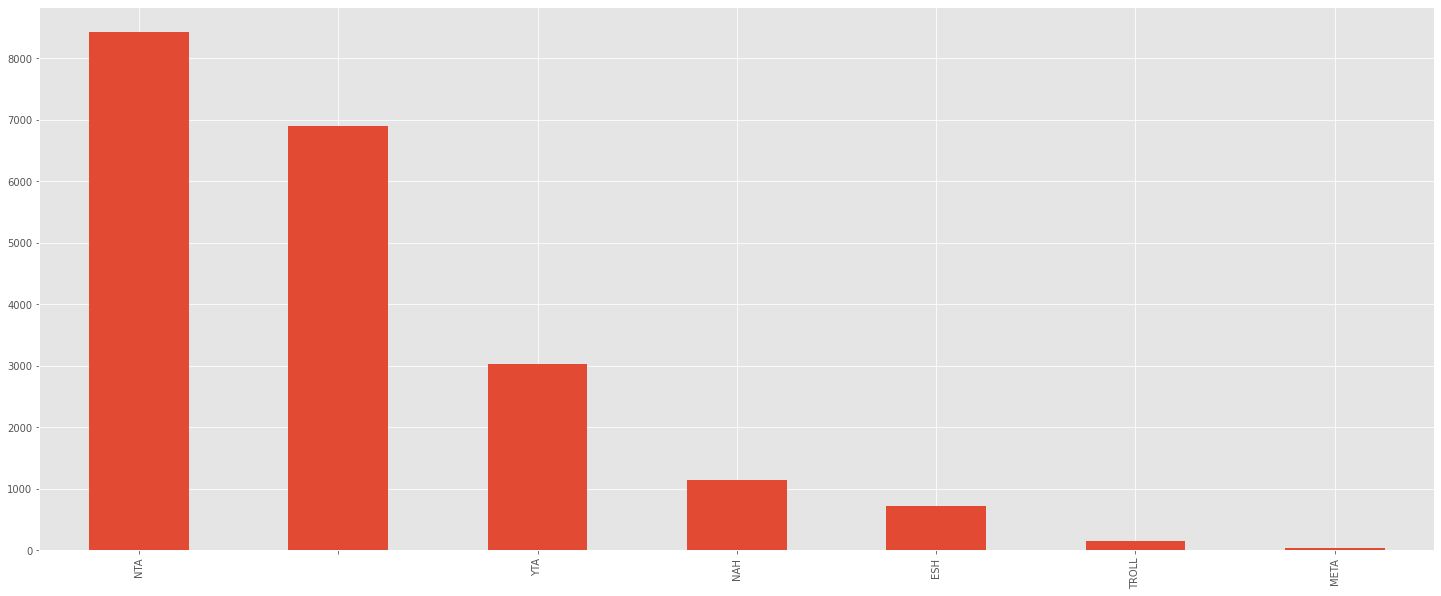

In [12]:
tag_series.value_counts().plot(kind='bar')

In [13]:
df['curated_tag'] = tag_series

In [14]:
# drop if no text

indices_no_text = df[df.text == ''].index
df = df.drop(indices_no_text)
indices_no_text = df[df.text == '[removed]'].index
df = df.drop(indices_no_text)
indices_no_text = df[df.text == '[deleted]'].index
df = df.drop(indices_no_text)

df.head()

,text,flair,comments,url,score,title,curated_tag
0,"This story needs a little setup, so bear with ...",not the a-hole,"[No, you're not the asshole here.\n\nIt's perf...",https://www.reddit.com/r/AmItheAsshole/comment...,43,AITA for not wanting my roommate to bring gues...,NTA
2,[Here's the thread.](https://www.reddit.com/r/...,not the a-hole,[holy fuck that's a lot of rules. You're not t...,https://www.reddit.com/r/AmItheAsshole/comment...,17,AITA in this thread where a mod ended up banni...,NTA
3,I was having a conversation with my friend las...,not the a-hole,"[Not an asshole, but perhaps a little clueless...",https://www.reddit.com/r/AmItheAsshole/comment...,16,AITA for assuming my friend was talking behind...,NTA
4,So school started up last week on Wednesday an...,everyone sucks,"[That was pretty dickish of the teacher, but s...",https://www.reddit.com/r/AmItheAsshole/comment...,20,AITA for not doing my homework?,ESH
5,I received an e-invite to a get together with ...,not the a-hole,[Doesn't seem like you not going actually nega...,https://www.reddit.com/r/AmItheAsshole/comment...,35,AITA for not going to this work event?,NTA


In [15]:
len(df)

19480

In [16]:
# drop if no comments
indices_no_comments = df[df.comments.astype(bool) == False].index
df = df.drop(indices_no_comments)
df.head()

,text,flair,comments,url,score,title,curated_tag
0,"This story needs a little setup, so bear with ...",not the a-hole,"[No, you're not the asshole here.\n\nIt's perf...",https://www.reddit.com/r/AmItheAsshole/comment...,43,AITA for not wanting my roommate to bring gues...,NTA
2,[Here's the thread.](https://www.reddit.com/r/...,not the a-hole,[holy fuck that's a lot of rules. You're not t...,https://www.reddit.com/r/AmItheAsshole/comment...,17,AITA in this thread where a mod ended up banni...,NTA
3,I was having a conversation with my friend las...,not the a-hole,"[Not an asshole, but perhaps a little clueless...",https://www.reddit.com/r/AmItheAsshole/comment...,16,AITA for assuming my friend was talking behind...,NTA
4,So school started up last week on Wednesday an...,everyone sucks,"[That was pretty dickish of the teacher, but s...",https://www.reddit.com/r/AmItheAsshole/comment...,20,AITA for not doing my homework?,ESH
5,I received an e-invite to a get together with ...,not the a-hole,[Doesn't seem like you not going actually nega...,https://www.reddit.com/r/AmItheAsshole/comment...,35,AITA for not going to this work event?,NTA


In [17]:
len(df)

19467

In [18]:
# Try to determine the tags where we don't have a mapper

df_no_curated_tag = df[df.curated_tag == '']
df_no_curated_tag.head()

,text,flair,comments,url,score,title,curated_tag
23,I just copied the comments and removed the las...,teenager,[Trying to read this gave me cancer. \n\nBut s...,https://www.reddit.com/r/AmItheAsshole/comment...,0,AITA for what i said,
32,Okay so I live with my parents and I am a litt...,too close to call,[Couldn't they have called or texted to ask if...,https://www.reddit.com/r/AmItheAsshole/comment...,2,AITA for refusing food when it was offered,
36,So I just started college this month. The coll...,tactless!,"[I don't know where you are, but $300 sounds c...",https://www.reddit.com/r/AmItheAsshole/comment...,22,AITA for not wanting to share my food,
76,My boyfriend had today off work. He forgot to ...,too close to call,"[I don't know if you're the asshole here, but ...",https://www.reddit.com/r/AmItheAsshole/comment...,25,AITA: SO's Alarm on His Day Off,
104,Here's how it went down. I order some Thai foo...,wow.,"[We get it guys, they're a planet sized thunde...",https://www.reddit.com/r/AmItheAsshole/comment...,32,AITA: for order food and changing my mind last...,


In [19]:
len(df_no_curated_tag)

6122

In [20]:
for comment in df_no_curated_tag.iloc[900].comments:
    print(comment)
    print('\n***********************\n')

I agree that it shouldn't be the guy's responsibility to plan all dates. But if either partner tells the other that they *are* going to plan a specific date, then it is their obligation to do so.

You're the asshole for snapping at her and saying she should have done it herself. Why would she have done it herself after you literally told her you would take care of it?

As far as waiting until Friday morning to make the reservation - I think she probably overreacted, but I would be a little annoyed if I was in her shoes. Many nice restaurants book several days in advance, and some won't even accept same-day reservations. I'm sure you'd be able to find something, but it might not be the best option and you had plenty of time to plan ahead.

***********************

Yes, you are the asshole. The time to bring up that it’s not solely the guy’s responsibility to plan date nights was when she was hinting about the date in the first place, not after you got caught procrastinating. 

*********

### Guess tags

Using a simple regex voting system we should be able to try and tag most of these

6122it [00:02, 2730.05it/s]


<AxesSubplot:>

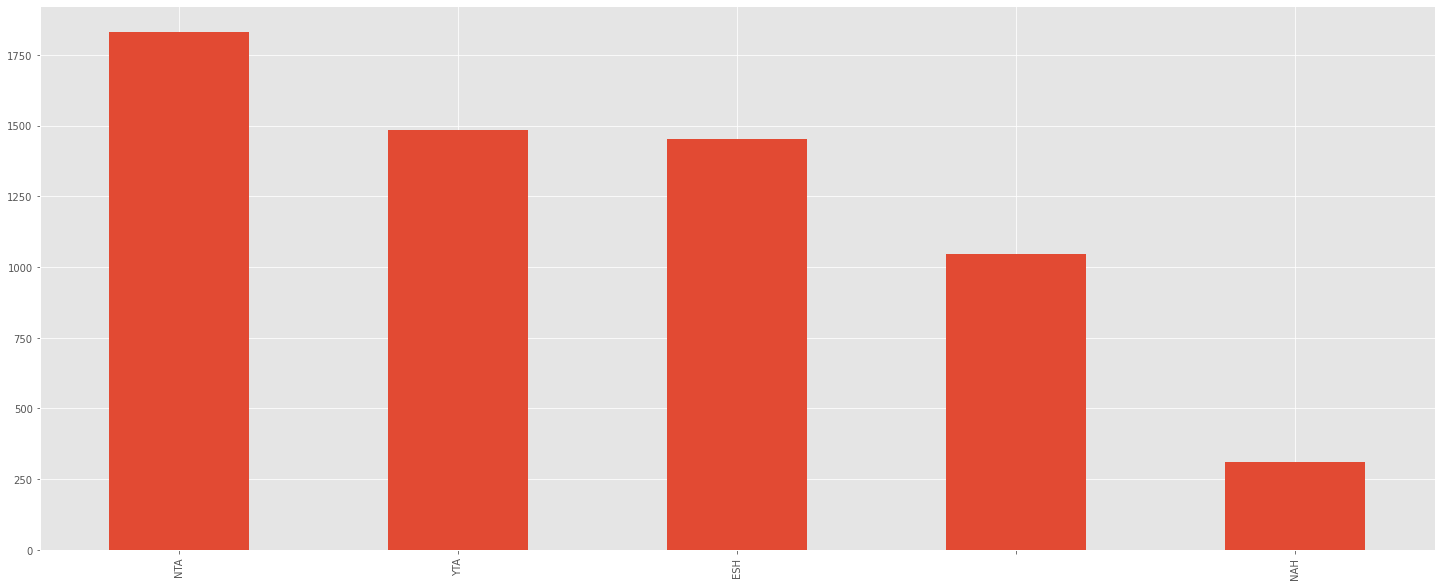

In [42]:
import re

esh_regexes = [
    r'\besh\b',
    r'everyone sucks',
    r'everyone[*a-z\' ,]*(shit|a[s*-]*hole)',
    r'You[a-z\' ,]* all [*a-z\' ,]+a[s*-]*hole'
]
nah_regexes = [
    r'\bnah\b',
    r'no a[s*-]*hole\s here',
    r'anyone[*a-z\' ,]*a[s*-]+hole'
]
nta_regexes = [
    r'\bnta\b',
    r'not[a-z*\' ,]*a[s*-]+hole'
]
yta_regexes = [
    r'\byta\b',
    r'you[a-z*\' ,]*a[s*-]+hole'
]

guessed_votes = []
still_no_tag = []

for i, row in tqdm(df_no_curated_tag.iterrows()):
    esh_votes = 0
    nah_votes = 0
    nta_votes = 0
    yta_votes = 0
    for comment in row.comments:
        for regex in esh_regexes:
            if re.search(regex, comment, re.IGNORECASE):
                esh_votes += 1
                break
        else:
            for regex in nah_regexes:
                if re.search(regex, comment, re.IGNORECASE):
                    nah_votes += 1
                    break
            else:
                for regex in nta_regexes:
                    if re.search(regex, comment, re.IGNORECASE):
                        nta_votes += 1
                        break
                else:
                    for regex in yta_regexes:
                        if re.search(regex, comment, re.IGNORECASE):
                            yta_votes += 1
                            break
    max_vote_count = max([esh_votes, nta_votes, nah_votes, yta_votes])
    if max_vote_count == 0:
        guessed_votes.append('')
        still_no_tag.append(row.comments)
    else:
        # bias to lower classes
        if esh_votes == max_vote_count:
            guessed_votes.append('ESH')
        elif nah_votes == max_vote_count:
            guessed_votes.append('NAH')
        elif yta_votes == max_vote_count:
            guessed_votes.append('YTA')
        else:
            guessed_votes.append('NTA')

guessed_series = pd.Series(guessed_votes)

guessed_series.value_counts().plot(kind='bar')

In [26]:
re.search(r'everyone[a-z\' ,]+(shit|a[s*-]*hole)', 'everyone is an ahole here', re.IGNORECASE)

<re.Match object; span=(0, 20), match='everyone is an ahole'>

In [46]:
still_no_tag[18]

['>They gave me so much shit about wanting the dog, and told me repeatedly that by owning the dog neither of my nephews were allowed to be at my house.\n\nWow, so right off the bat you chose an aggressive dog over your own nephews.  \n\n>I was trying to give the dog the benefit of the doubt, as the circumstances sound like it might have thought it was rescuing the baby.\n\nThat\'s stupid, a dog isn\'t going to try to "rescue" a baby who isn\'t distressed.  The dog was aggressive, non-aggressive dogs don\'t wound babies to the point of needing stitches. \n\n>Instead of contacting me and asking what happened he jumped into the family chat (that I excluded myself from) and proceeded to talk shit about me for giving the dog to the pound.\n\nFunny you criticize him for not asking you about what happened, but you couldn\'t be bothered to run it by him before taking the dog to the pound.  For all you know he\'d done a ton of research to find a no-kill rehabilitation shelter, whereas you might

In [48]:
df_no_curated_tag['regex_tag'] = guessed_series

df_no_curated_tag.head()

/Users/declanatkins/opt/anaconda3/envs/aita/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,flair,comments,url,score,title,curated_tag,regex_tag
23,I just copied the comments and removed the las...,teenager,[Trying to read this gave me cancer. \n\nBut s...,https://www.reddit.com/r/AmItheAsshole/comment...,0,AITA for what i said,,NTA
32,Okay so I live with my parents and I am a litt...,too close to call,[Couldn't they have called or texted to ask if...,https://www.reddit.com/r/AmItheAsshole/comment...,2,AITA for refusing food when it was offered,,ESH
36,So I just started college this month. The coll...,tactless!,"[I don't know where you are, but $300 sounds c...",https://www.reddit.com/r/AmItheAsshole/comment...,22,AITA for not wanting to share my food,,YTA
76,My boyfriend had today off work. He forgot to ...,too close to call,"[I don't know if you're the asshole here, but ...",https://www.reddit.com/r/AmItheAsshole/comment...,25,AITA: SO's Alarm on His Day Off,,YTA
104,Here's how it went down. I order some Thai foo...,wow.,"[We get it guys, they're a planet sized thunde...",https://www.reddit.com/r/AmItheAsshole/comment...,32,AITA: for order food and changing my mind last...,,YTA


In [57]:
for i, row in df_no_curated_tag.iterrows():
    if row.regex_tag:
        df.loc[i].curated_tag = row.regex_tag

In [59]:
df.loc[104]

text           Here's how it went down. I order some Thai foo...
flair                                                       wow.
comments       [We get it guys, they're a planet sized thunde...
url            https://www.reddit.com/r/AmItheAsshole/comment...
score                                                         32
title          AITA: for order food and changing my mind last...
curated_tag                                                  YTA
Name: 104, dtype: object

<AxesSubplot:>

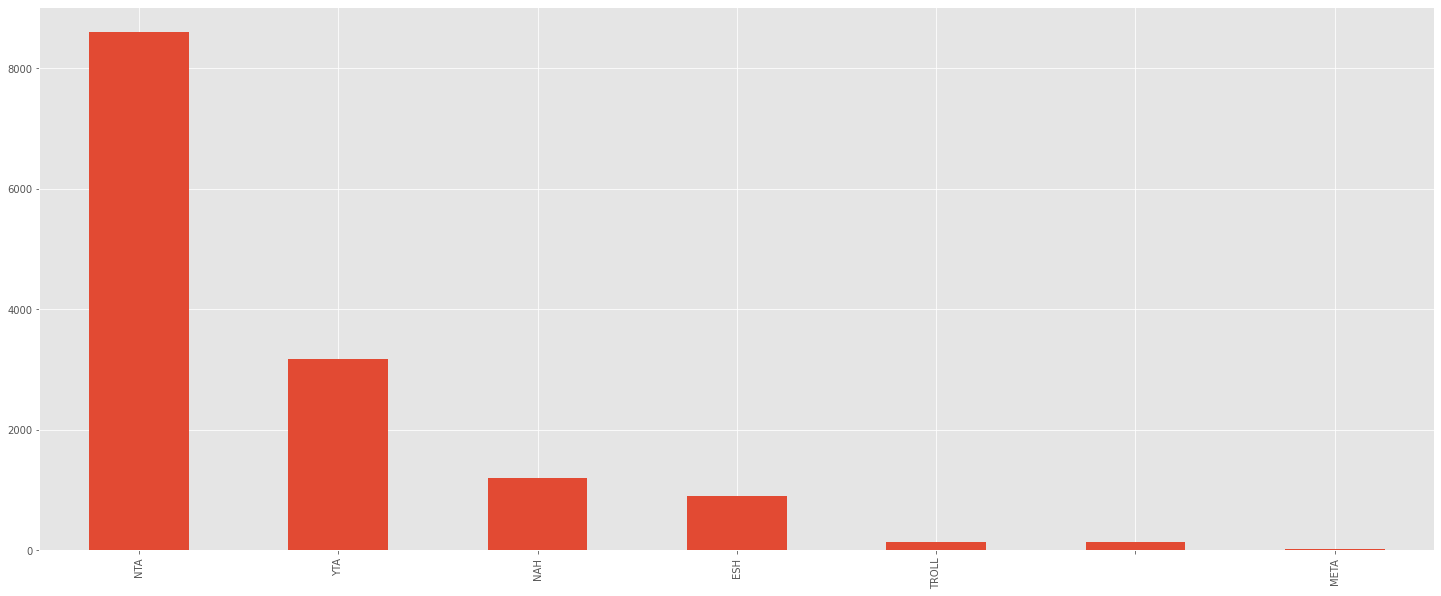

In [60]:
df.curated_tag.value_counts().plot(kind='bar')

In [61]:
indices_drop_tag = df[df.curated_tag == ''].index
df = df.drop(indices_drop_tag)
indices_drop_tag = df[df.curated_tag == 'TROLL'].index
df = df.drop(indices_drop_tag)
indices_drop_tag = df[df.curated_tag == 'META'].index
df = df.drop(indices_drop_tag)

df.head()

,text,flair,comments,url,score,title,curated_tag
0,"This story needs a little setup, so bear with ...",not the a-hole,"[No, you're not the asshole here.\n\nIt's perf...",https://www.reddit.com/r/AmItheAsshole/comment...,43,AITA for not wanting my roommate to bring gues...,NTA
2,[Here's the thread.](https://www.reddit.com/r/...,not the a-hole,[holy fuck that's a lot of rules. You're not t...,https://www.reddit.com/r/AmItheAsshole/comment...,17,AITA in this thread where a mod ended up banni...,NTA
3,I was having a conversation with my friend las...,not the a-hole,"[Not an asshole, but perhaps a little clueless...",https://www.reddit.com/r/AmItheAsshole/comment...,16,AITA for assuming my friend was talking behind...,NTA
4,So school started up last week on Wednesday an...,everyone sucks,"[That was pretty dickish of the teacher, but s...",https://www.reddit.com/r/AmItheAsshole/comment...,20,AITA for not doing my homework?,ESH
5,I received an e-invite to a get together with ...,not the a-hole,[Doesn't seem like you not going actually nega...,https://www.reddit.com/r/AmItheAsshole/comment...,35,AITA for not going to this work event?,NTA


In [62]:
len(df)

19174

<AxesSubplot:>

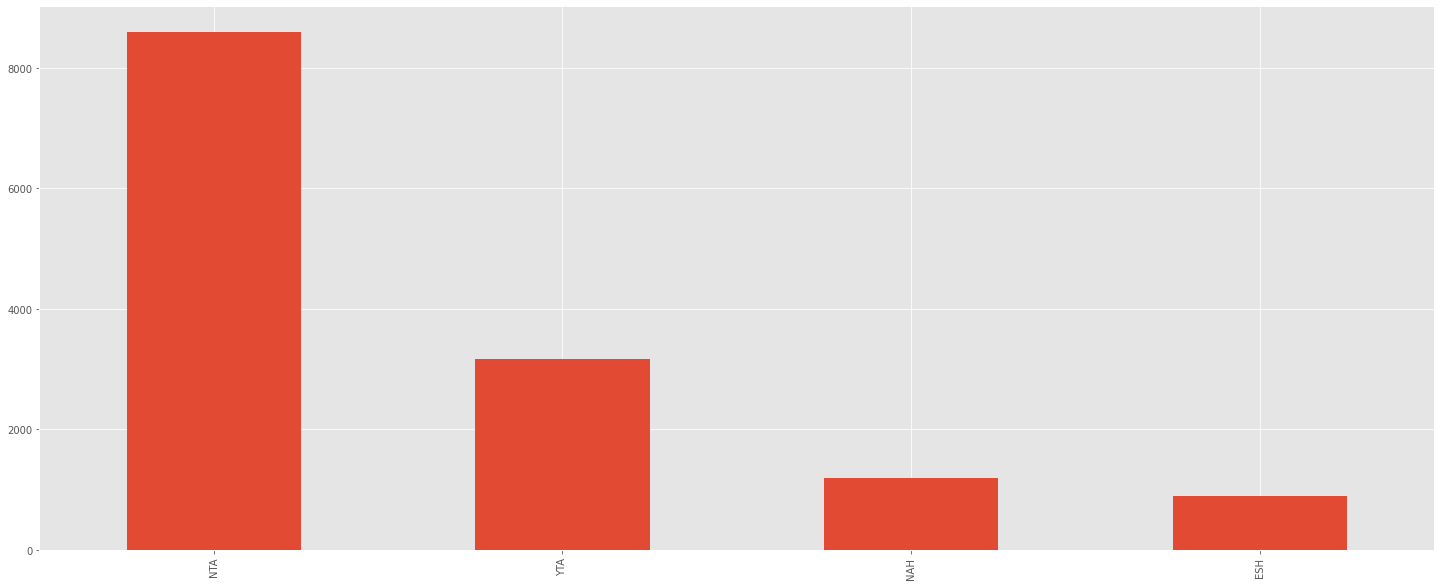

In [63]:
df.curated_tag.value_counts().plot(kind='bar')

In [65]:
df.to_csv('../data/curated-submission-tag-2016-2020.csv', index=False)